<span style="font-family: Verdana; font-weight:bold;font-size:1.3em;color:#B22222;"> COMPUTER VISION - CNN CLASSIFICATION Techniques
    
<span style="font-family: Verdana; font-weight:bold;font-size:1.0em;color:#4682B4;"> Machine Learning and Artificial Intelligence Course - Texas University
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> RAFAEL SOARES DE CARVALHO

##### Previus Run - Imports Data, Libraries and functions for analysis

In [83]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split
import cv2

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#from google.colab.patches import cv2_imshow

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [2]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import tensorflow
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

# LOAD IMAGES DATASET   ------------------------------

In [3]:
ds_images = np.load('images.npy')

In [4]:
ds_images.shape

(4750, 128, 128, 3)

In [5]:
ds_images[1]

array([[[ 30,  47,  63],
        [ 30,  50,  60],
        [ 34,  47,  63],
        ...,
        [ 48,  59,  74],
        [ 42,  54,  69],
        [ 44,  56,  70]],

       [[ 30,  49,  67],
        [ 26,  47,  60],
        [ 30,  40,  61],
        ...,
        [ 50,  64,  76],
        [ 52,  67,  78],
        [ 45,  56,  72]],

       [[ 23,  46,  65],
        [ 27,  48,  64],
        [ 25,  40,  59],
        ...,
        [ 39,  59,  81],
        [ 47,  62,  79],
        [ 42,  54,  69]],

       ...,

       [[ 32,  54,  72],
        [ 58,  82,  95],
        [ 72,  96, 109],
        ...,
        [ 60,  80,  99],
        [ 50,  72,  92],
        [ 45,  64,  84]],

       [[ 31,  51,  67],
        [ 25,  50,  64],
        [ 38,  64,  80],
        ...,
        [ 63,  83, 101],
        [ 57,  78,  96],
        [ 50,  69,  89]],

       [[ 18,  32,  56],
        [ 16,  27,  50],
        [ 34,  49,  71],
        ...,
        [ 59,  84, 101],
        [ 55,  80,  97],
        [ 39,  59,  82]]

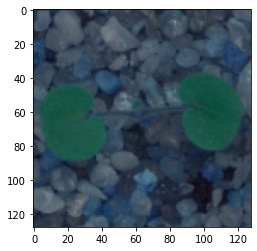

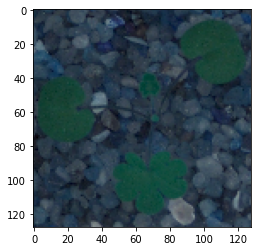

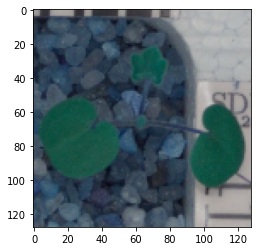

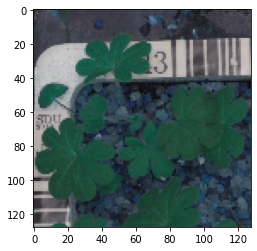

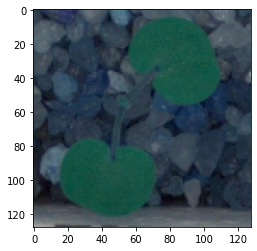

In [6]:
fig = plt.figure()
for i in range(5):
    plt.imshow(ds_images[i], cmap='gray')
    plt.show()

# LOAD LABELS DATASET  ------------------------------

In [7]:
Labels = pd.read_csv('Labels.csv') 

In [8]:
Labels.shape

(4750, 1)

In [9]:
Labels.head(5)

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [10]:
print(Labels.value_counts().shape, 'TOTAL VARIABLES')

(12,) TOTAL VARIABLES


# NORMALIZATION ---------------------

In [12]:
ds_images_norm = ds_images.astype('float32')

ds_images_norm /= 255

In [13]:
ds_images[1]

array([[[ 30,  47,  63],
        [ 30,  50,  60],
        [ 34,  47,  63],
        ...,
        [ 48,  59,  74],
        [ 42,  54,  69],
        [ 44,  56,  70]],

       [[ 30,  49,  67],
        [ 26,  47,  60],
        [ 30,  40,  61],
        ...,
        [ 50,  64,  76],
        [ 52,  67,  78],
        [ 45,  56,  72]],

       [[ 23,  46,  65],
        [ 27,  48,  64],
        [ 25,  40,  59],
        ...,
        [ 39,  59,  81],
        [ 47,  62,  79],
        [ 42,  54,  69]],

       ...,

       [[ 32,  54,  72],
        [ 58,  82,  95],
        [ 72,  96, 109],
        ...,
        [ 60,  80,  99],
        [ 50,  72,  92],
        [ 45,  64,  84]],

       [[ 31,  51,  67],
        [ 25,  50,  64],
        [ 38,  64,  80],
        ...,
        [ 63,  83, 101],
        [ 57,  78,  96],
        [ 50,  69,  89]],

       [[ 18,  32,  56],
        [ 16,  27,  50],
        [ 34,  49,  71],
        ...,
        [ 59,  84, 101],
        [ 55,  80,  97],
        [ 39,  59,  82]]

In [14]:
ds_images_norm[1]

array([[[0.11764706, 0.18431373, 0.24705882],
        [0.11764706, 0.19607843, 0.23529412],
        [0.13333334, 0.18431373, 0.24705882],
        ...,
        [0.1882353 , 0.23137255, 0.2901961 ],
        [0.16470589, 0.21176471, 0.27058825],
        [0.17254902, 0.21960784, 0.27450982]],

       [[0.11764706, 0.19215687, 0.2627451 ],
        [0.10196079, 0.18431373, 0.23529412],
        [0.11764706, 0.15686275, 0.23921569],
        ...,
        [0.19607843, 0.2509804 , 0.29803923],
        [0.20392157, 0.2627451 , 0.30588236],
        [0.1764706 , 0.21960784, 0.28235295]],

       [[0.09019608, 0.18039216, 0.25490198],
        [0.10588235, 0.1882353 , 0.2509804 ],
        [0.09803922, 0.15686275, 0.23137255],
        ...,
        [0.15294118, 0.23137255, 0.31764707],
        [0.18431373, 0.24313726, 0.30980393],
        [0.16470589, 0.21176471, 0.27058825]],

       ...,

       [[0.1254902 , 0.21176471, 0.28235295],
        [0.22745098, 0.32156864, 0.37254903],
        [0.28235295, 0

# Blurring Images --------------------

In [16]:
print(len(ds_images_norm)) # Check the number of rows in the dataset.
print(ds_images_norm.shape)

4750
(4750, 128, 128, 3)


Original Image:



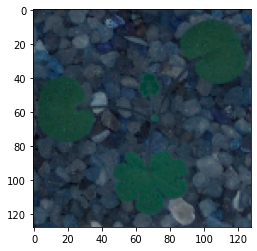

In [17]:
Gaussian1 = cv2.GaussianBlur(ds_images_norm[1], (5, 5), 0)
Gaussian2 = cv2.GaussianBlur(ds_images_norm[1], (15, 15), 0)

print('Original Image:\n')
plt.imshow(ds_images_norm[1], cmap='gray')


 Output after first gaussian blurring: 



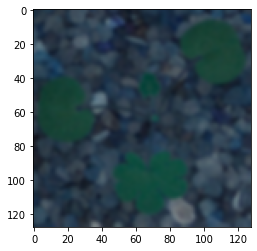

In [18]:
print('\n Output after first gaussian blurring: \n')
plt.imshow(Gaussian1, cmap='gray')
#print('\n Output after second gaussian blurring: \n')
#cv2_imshow(Gaussian2[0])


 Output after second gaussian blurring: 



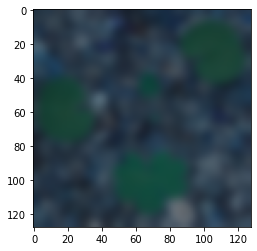

In [19]:
print('\n Output after second gaussian blurring: \n')
plt.imshow(Gaussian2, cmap='gray')
#print('\n Output after second gaussian blurring: \n')
#cv2_imshow(Gaussian2[0])

In [20]:
#Empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
new_x = np.empty((4750, 128, 128,3)) 

In [21]:
new_x.shape

(4750, 128, 128, 3)

In [22]:
ds_images_norm[0].shape

(128, 128, 3)

In [23]:
for idx, line in enumerate(ds_images_norm):
  new_x[idx] = line.reshape((128, 128,3))

In [24]:
# Apply the gaussian blur to each 128x128x3 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(new_x):
  new_x[idx] = cv2.GaussianBlur(ds_images_norm[idx], (5, 5), 0)

ORIGINAL IMAGE 10 ON DATASET


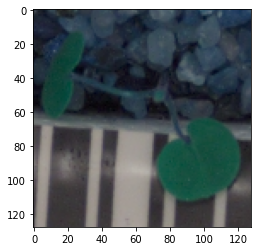

In [25]:
IMAGE_NBR = 10
print('ORIGINAL IMAGE',IMAGE_NBR,'ON DATASET')
plt.imshow(ds_images_norm[IMAGE_NBR], cmap='gray')

GAUSSIAN BLUR IMAGE 10  ON DATASET


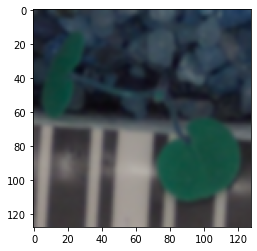

In [26]:
print('GAUSSIAN BLUR IMAGE', IMAGE_NBR , ' ON DATASET')
plt.imshow(new_x[IMAGE_NBR], cmap='gray')

In [27]:
print ('Original dataset 1st row')
print ('SHAPE: ',ds_images.shape)
print (ds_images[1])
print ('\nBlur dataset 1st row')
print ('SHAPE: ',new_x.shape)
print (new_x[1])


Original dataset 1st row
SHAPE:  (4750, 128, 128, 3)
[[[ 30  47  63]
  [ 30  50  60]
  [ 34  47  63]
  ...
  [ 48  59  74]
  [ 42  54  69]
  [ 44  56  70]]

 [[ 30  49  67]
  [ 26  47  60]
  [ 30  40  61]
  ...
  [ 50  64  76]
  [ 52  67  78]
  [ 45  56  72]]

 [[ 23  46  65]
  [ 27  48  64]
  [ 25  40  59]
  ...
  [ 39  59  81]
  [ 47  62  79]
  [ 42  54  69]]

 ...

 [[ 32  54  72]
  [ 58  82  95]
  [ 72  96 109]
  ...
  [ 60  80  99]
  [ 50  72  92]
  [ 45  64  84]]

 [[ 31  51  67]
  [ 25  50  64]
  [ 38  64  80]
  ...
  [ 63  83 101]
  [ 57  78  96]
  [ 50  69  89]]

 [[ 18  32  56]
  [ 16  27  50]
  [ 34  49  71]
  ...
  [ 59  84 101]
  [ 55  80  97]
  [ 39  59  82]]]

Blur dataset 1st row
SHAPE:  (4750, 128, 128, 3)
[[[0.11213235 0.18590686 0.2447304 ]
  [0.11424632 0.18238358 0.24310662]
  [0.12003677 0.17757353 0.24191177]
  ...
  [0.17895222 0.23125002 0.2857537 ]
  [0.18210787 0.23385417 0.28887868]
  [0.18192402 0.23272058 0.28799021]]

 [[0.10821078 0.18455882 0.2459559 ]


# One Hot Vector for Labels -----------------

In [29]:
labelencoder = LabelEncoder()
Labels['Cat'] = labelencoder.fit_transform(Labels)


In [30]:
Labels.value_counts()

Label                      Cat
Loose Silky-bent           6      654
Common Chickweed           3      611
Scentless Mayweed          8      516
Small-flowered Cranesbill  10     496
Fat Hen                    5      475
Charlock                   1      390
Sugar beet                 11     385
Cleavers                   2      287
Black-grass                0      263
Shepherds Purse            9      231
Maize                      7      221
Common wheat               4      221
dtype: int64

In [31]:

print(Labels['Cat'].value_counts().shape, 'TOTAL LABELS')

Labels_vec = to_categorical(Labels['Cat'], num_classes=12)


print("Shape of LABELS:", Labels.shape)
print("Shape of LABELS VECTOR: ", Labels_vec.shape)
print("Value of LABELS[0]:", Labels_vec[0])

(12,) TOTAL LABELS
Shape of LABELS: (4750, 2)
Shape of LABELS VECTOR:  (4750, 12)
Value of LABELS[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# Split data Blured into test and train to build the model.

In [32]:
X_trainB, X_testB, y_trainB, y_testB = train_test_split(new_x, Labels_vec, train_size=0.75, random_state=0)

6

In [33]:
X_trainB[9, :, :, :].shape

(128, 128, 3)

In [34]:
# Print the shape of dataset.
print('x_train shape:', X_trainB.shape)
print(X_trainB.shape[0], 'train samples')
print(X_testB.shape[0], 'test samples')

x_train shape: (3562, 128, 128, 3)
3562 train samples
1188 test samples


# Set the CNN model

In [35]:
batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_trainB.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

# Adam optimizer and Crossentropy Loss

In [36]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

# Convert to Float and Normalize Xtrain and XTest  to Reshape

In [39]:
x_train = X_trainB.astype('float32') # Conversion to float type from integer type.
x_test = X_testB.astype('float32')
x_train /= 255.0 # Division by 255
x_test /= 255.0

In [41]:
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)

print(x_train.shape)
print(x_test.shape)

(3562, 128, 128, 3)
(1188, 128, 128, 3)


# Fit The Model

In [40]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)
model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

Epoch 1/20
112/112 [==============================] - ETA: 0s - loss: 3.2762 - accuracy: 0.1937
Epoch 00001: val_loss improved from inf to 2.70380, saving model to cifar_cnn_checkpoint_01_loss2.7038.h5
112/112 [==============================] - 173s 2s/step - loss: 3.2762 - accuracy: 0.1937 - val_loss: 2.7038 - val_accuracy: 0.0505
Epoch 2/20
112/112 [==============================] - ETA: 0s - loss: 1.8891 - accuracy: 0.3456
Epoch 00002: val_loss improved from 2.70380 to 2.66284, saving model to cifar_cnn_checkpoint_02_loss2.6628.h5
112/112 [==============================] - 152s 1s/step - loss: 1.8891 - accuracy: 0.3456 - val_loss: 2.6628 - val_accuracy: 0.0505
Epoch 3/20
112/112 [==============================] - ETA: 0s - loss: 1.6728 - accuracy: 0.4065
Epoch 00003: val_loss did not improve from 2.66284
112/112 [==============================] - 179s 2s/step - loss: 1.6728 - accuracy: 0.4065 - val_loss: 2.6997 - val_accuracy: 0.1313
Epoch 4/20
112/112 [=============================

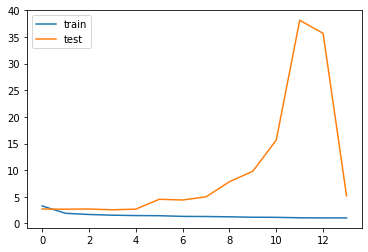

In [43]:
history = model.fit(x_train,
                    y_trainB,
                    batch_size=batch_size,
                    epochs=20,
                    validation_data=(x_test, y_testB),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Model Evaluation

In [72]:
# Score trained model.
scores = model.evaluate(x_test, y_testB, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

38/38 [==============================] - 10s 260ms/step - loss: 5.1816 - accuracy: 0.0581
Test loss: 5.181573867797852
Test accuracy: 0.05808080732822418


# Data Prediction  for X_test in [ 2, 3, 33, 36, 59 ]

Predicted label: 7
Real Label 4


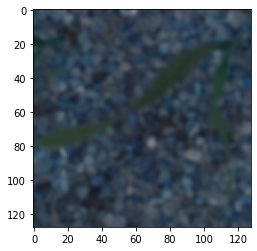

In [66]:
plt.imshow(X_testB[2].reshape(128, 128,3), cmap='gray')
y_pred = model.predict(X_testB[2].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Real Label", y_testB[2].argmax())

Predicted label: 7
Real Label 6


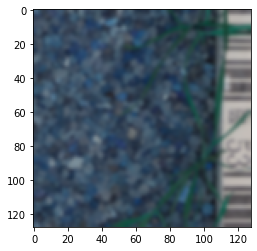

In [67]:
plt.imshow(X_testB[3].reshape(128, 128,3), cmap='gray')
y_pred = model.predict(X_testB[3].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Real Label", y_testB[3].argmax())

Predicted label: 3
Real Label 5


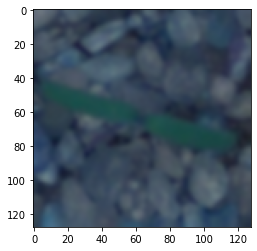

In [68]:
plt.imshow(X_testB[33].reshape(128, 128,3), cmap='gray')
y_pred = model.predict(X_testB[33].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Real Label", y_testB[33].argmax())

Predicted label: 7
Real Label 4


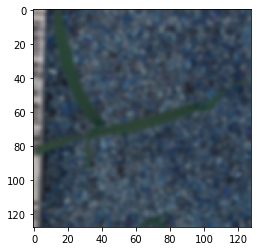

In [69]:
plt.imshow(X_testB[36].reshape(128, 128,3), cmap='gray')
y_pred = model.predict(X_testB[36].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Real Label", y_testB[36].argmax())

Predicted label: 3
Real Label 8


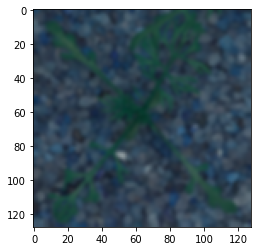

In [70]:
plt.imshow(X_testB[59].reshape(128, 128,3), cmap='gray')
y_pred = model.predict(X_testB[59].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Real Label", y_testB[59].argmax())

In [143]:
# make a prediction
y_predict = model.predict_classes(X_testB)
x = pd.DataFrame(np.argmax(y_testB, axis=1, out=None)+1).copy()
x.reset_index(drop=True, inplace=True) 
x["Predicted"] = pd.DataFrame(y_predict)

In [144]:
#Prediction 
x

,0,Predicted
0,1,7
1,2,3
2,5,7
3,7,7
4,6,7
...,...,...
1183,7,7
1184,9,7
1185,2,7
1186,9,3


# Prediction Analisis

In [139]:
y_reverse = np.argmax(y_testB, axis=1, out=None)+1
ycheck = y_reverse == y_predict
ycheck = ycheck*1


Text(0.5, 24.0, 'Predicted label (model 1)')

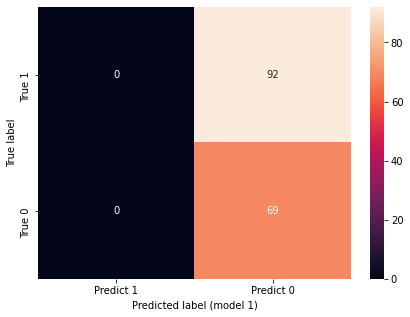

In [140]:
cm=metrics.confusion_matrix(np.argmax(y_testB, axis=1, out=None), ycheck, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["True 1","True 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label (model 1)')